# Loksodromski problem (Rhumb Line)

**author**: *aleksander.grm@fpp.uni-lj.si*,<br>
**date**: 2022

Pri analizi loksodromske plovbe ločimo v osnovi **dva** problema
- določitev razdalje $D_L$ in kurza odhoda $\omega_L$
- določitev položaja prihoda $P_1=(\varphi_1,\lambda_1)$

Za oba problema si poglejmo izračun parametrov. Izračuni potekajo z uporabo **Merkatorjeve srednje širine** $\tilde{\varphi}$, kar pomeni, da so izračuni natančni na Zemlji popisani kot sferične oblike. Za določitev na *WGS84* elipsoidu je potrebno narediti popravke za Merkatorjevo širino. Popravki so zanemarljivi, zato ponavadi vedno računamo z uporabo sfere kot približkom zemeljske oble!

Položaje vnašama v obliki, kot je v navtiki dogovor 

$\varphi = \#\#^\circ \, \#\#.\#' \, \mathrm{N/S}$, $\lambda = \#\#\#^\circ \, \#\#.\#' \, \mathrm{E/W}$, 

kjer imamo stopinje kot celo število in minute kot število na 1 decimalno mesto natančno.

Format vnosa položaja:
- LAT-$\varphi$ in LONG-$\lambda$ vnašamo v formatu [stopinje, minute, stran neba]

Primer vnosa položaja:
- $\varphi$: [12, 34.5, 'N']
- $\lambda$: [117, 12.6, 'W']
- stran neba mora biti v **enojnih navednicah**, kjer so dovoljeni znaki 'N', 'S', 'E', 'W'

In [1]:
# Nalaganje paketi za izračun loksodromoske plovbe
import os, sys

# nav tools path
sys.path.append('../nav_tools')

# needed by basemap
os.environ['PROJ_LIB'] = '/opt/miniconda3/envs/astrolab/share/proj'

In [2]:
import navtools as nt
import rhumbline as rl

## Prvi loksodromski problem

Imamo podan položaj odhoda (departure) $P_0=(\varphi_0, \lambda_0)$ in položaj prihoda (arrival) $P_1=(\varphi_1, \lambda_1)$. Potrebno je določiti loksodromsko razdaljo $D_L$ in loksodromski kurz $\omega_L$ med $P_0$ in $P_1$.

**Inputs**

- $P_0=(\varphi_0, \lambda_0)$ - položaj odhoda
- $P_1=(\varphi_1, \lambda_1)$ - položaj prihoda

**Outputs**

- $D_L$ - loksodromska razdalja v navtičnih miljah $[\mathrm{Nm}]$
- $\omega_L$ - loksodromski kurz v stopinjah $[^\circ]$

In [3]:
# Položaj odhoda
fi0 = [36,1.6,'N']
la0 = [6,34.8,'W']
P0 = [nt.nav2dd(fi0),nt.nav2dd(la0)]

# Položaj prihoda
fi1 = [40,24.5,'N']
la1 = [73,22.3,'W']
P1 = [nt.nav2dd(fi1),nt.nav2dd(la1)]

# izračun 1.loksodromskega problema
# točen izračun z uporabo Merkatorjeve širine
[d, w] = rl.rhumbLineP1(P0, P1)

# izpis vhodov in rezultatov
print('departure:',nt.getPositionString(P0))
print('  arrival:',nt.getPositionString(P1))
print('----------------')
print('distance: {:.1f}Nm'.format(d))
print('  course: {:.2f}{:s}'.format(w,nt.arc_deg))

departure: φ=36°01.60′N; λ=006°34.80′W
  arrival: φ=40°24.50′N; λ=073°22.30′W
----------------
distance: 3157.8Nm
  course: 274.78°


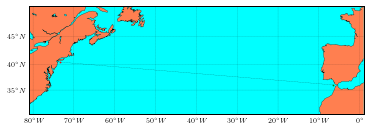

In [4]:
# izris položajev na Merkatorjevi karti
pts = nt.position2array([P0,P1])
nt.plotRLPath(pts, 5, 10, 'rhumb_line_01.pdf')

<hr>

## Drugi loksodromski problem

Imamo podan položaj odhoda (departure) $P_0=(\varphi_0, \lambda_0)$ in loksodromsko razdaljo $D_L$ in loksodromski kurz $\omega_L$ med $P_0$ in $P_1$. Potrebno je določiti položaj prihoda (arrival) $P_1=(\varphi_1, \lambda_1)$.

**Inputs**

- $P_0=(\varphi_0, \lambda_0)$ - položaj odhoda
- $D_L$ - loksodromska razdalja v navtičnih miljah $[\mathrm{Nm}]$
- $\omega_L$ - loksodromski kurz v stopinjah $[^\circ]$

**Outputs**

- $P_1=(\varphi_1, \lambda_1)$ - položaj prihoda

In [5]:
# položaj odhoda fi,la=[+/-deg,min]
fi0 = [36,1.6,'N']
la0 = [6,34.8,'W']
P0 = [nt.nav2dd(fi0),nt.nav2dd(la0)]

# loksodromska distanca in kurz
dL = 3157.8 # Nm
wL =  274.78 # deg

# izračun 2.loksodromskega problema
# točen izračun z uporabo Merkatorjeve širine
[fi1, la1] = rl.rhumbLineP2(P0, dL, wL)
#[fi1, la1] = rl.rhumbLineP2(P0, d, w)
P1 = [fi1,la1]

# izpis vhodov in rezultatov
print('departure:',nt.getPositionString(P0))
print(' distance: {:.1f}Nm'.format(d))
print('   course: {:.2f}{:s}'.format(w,nt.arc_deg))
print('----------------')
print('  arrival:',nt.getPositionString(P1))

departure: φ=36°01.60′N; λ=006°34.80′W
 distance: 3157.8Nm
   course: 274.78°
----------------
  arrival: φ=40°24.74′N; λ=073°22.38′W


In [6]:
# Položaj odhoda
fi0 = [41,0,'N']
la0 = [14,0,'E']
P0 = [nt.nav2dd(fi0),nt.nav2dd(la0)]

# Položaj prihoda
fi1 = [41,0,'N']
la1 = [73,0,'W']
P1 = [nt.nav2dd(fi1),nt.nav2dd(la1)]

# izračun 1.loksodromskega problema
# točen izračun z uporabo Merkatorjeve širine
[d, w] = rl.rhumbLineP1(P0, P1)

# izpis vhodov in rezultatov
print('departure:',nt.getPositionString(P0))
print('  arrival:',nt.getPositionString(P1))
print('----------------')
print('distance: {:.1f}Nm'.format(d))
print('  course: {:.2f}{:s}'.format(w,nt.arc_deg))

departure: φ=41°00.00′N; λ=014°00.00′E
  arrival: φ=41°00.00′N; λ=073°00.00′W
----------------
distance: 3939.6Nm
  course: 270.00°


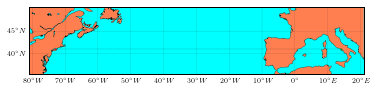

In [7]:
# izris položajev na Merkatorjevi karti
pts = nt.position2array([P0,P1])
nt.plotRLPath(pts, 5, 10, 'rhumb_line_01.pdf')